In [325]:
import pandas as pd

In [326]:
data = pd.read_csv('..\EDA-2. Математическая статистика в контексте EDA\data\wine_cleared.csv');

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Lario\AppData\Local\Temp\ipykernel_11896\1838893823.py:1: SyntaxWarning: invalid escape sequence '\E'
  data = pd.read_csv('..\EDA-2. Математическая статистика в контексте EDA\data\wine_cleared.csv');


In [327]:
data['price_round'] = data['price'].astype(int)
display(data['price_round'])
display(data.head(1))

0         35
1         15
2         14
3         13
4         65
          ..
129966    28
129967    75
129968    30
129969    32
129970    21
Name: price_round, Length: 129971, dtype: int64

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35


In [328]:
display(data.head(1))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35


In [329]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lario\AppData\Local\Temp\ipykernel_11896\1904379352.py:1: SyntaxWarning: invalid escape sequence '\d'
  regex = '\d{4}' # регулярное выражение для нахождения чисел


In [330]:
display(data.head(1))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013


#### Создадим бинарные признаки для 3 самых популярных производителей вина (например в США/не в США) 

In [331]:
display(data['country'].value_counts().head(3))

country
US        54504
France    22093
Italy     19540
Name: count, dtype: int64

In [332]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)
# Проверим
print(data['is_france'].sum())
print(data['is_italy'].sum())

22093
19540


Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.
В ответ впишите результат выполнения кода data['old_wine'].sum():

In [333]:
import numpy as np
data['year2'] = data['year'].fillna(2025)
data['year2'] = data['year2'].astype(int)
data['old_wine'] = data['year2'].apply(lambda x: 1 if x < 2010 else 0)

data.sort_values(by='year')
data['old_wine'].sum()

np.int64(39781)

In [334]:
display(data.head(1))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,year2,old_wine
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,2013,0


Задание 2.7 (Самопроверка)
Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.
Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

Ответом на это задание является получившееся регулярное выражение и код преобразования.

In [335]:
data['title']

0                         Nicosia 2013 Vulkà Bianco  (Etna)
1             Quinta dos Avidagos 2011 Avidagos Red (Douro)
2             Rainstorm 2013 Pinot Gris (Willamette Valley)
3         St. Julian 2013 Reserve Late Harvest Riesling ...
4         Sweet Cheeks 2012 Vintner's Reserve Wild Child...
                                ...                        
129966    Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967                    Citation 2004 Pinot Noir (Oregon)
129968    Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969        Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
129970    Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...
Name: title, Length: 129971, dtype: object

In [336]:
import re

In [337]:
regex = '\((.*)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)
#result = re.findall(r'\((.*)\)', 'Rainstorm 2013 Pinot Gris (Willamette Valley)')
#print(result)
display(data['locality'])

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\Lario\AppData\Local\Temp\ipykernel_11896\3675661708.py:1: SyntaxWarning: invalid escape sequence '\('
  regex = '\((.*)\)'


0                                                      Etna
1                                                     Douro
2                                         Willamette Valley
3                                       Lake Michigan Shore
4                                         Willamette Valley
                                ...                        
129966    Erben Müller-Burggraef) 2013 Brauneberger Juff...
129967                                               Oregon
129968                                               Alsace
129969                                               Alsace
129970                                               Alsace
Name: locality, Length: 129971, dtype: object

In [338]:
result = re.findall(r'@\w+', 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz')
print(result)

['@gmail', '@test', '@analyticsvidhya', '@rest']


In [339]:
display(data.head(1))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,year2,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013,0,0,1,2013,0,Etna


##  3. Создание признаков. Внешние источники данных

In [340]:
import pandas as pd 
country_population = pd.read_csv('data\country_population.csv', sep = ';')

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Lario\AppData\Local\Temp\ipykernel_11896\3766957776.py:2: SyntaxWarning: invalid escape sequence '\c'
  country_population = pd.read_csv('data\country_population.csv', sep = ';')


In [341]:
display(country_population[country_population['country'] == 'Italy'])

,country,population
24,Italy,"59,097,904"


Объединим таблицы data и country_population по ключу country

In [342]:
data = data.join(country_population.set_index('country'), on='country')

In [343]:
# Теперь таблица с площадью стран
country_area = pd.read_csv('data\country_area.csv', sep=';')

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Lario\AppData\Local\Temp\ipykernel_11896\1908070285.py:2: SyntaxWarning: invalid escape sequence '\c'
  country_area = pd.read_csv('data\country_area.csv', sep=';')


Задание 3.2
Создайте новый признак area_country — площадь страны, аналогичный признаку population.

Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.

In [344]:
data = data.merge(country_area, on= 'country')

In [345]:
round(data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area'],0)

94    9372610.0
Name: area, dtype: float64

In [346]:
display(data.head(1))

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,price_round,year,is_usa,is_france,is_italy,year2,old_wine,locality,population,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,35,2013,0,0,1,2013,0,Etna,"59,097,904",301230.0


## Создание признаков. Работа с форматом «дата-время»

Создадим таблицу   
client_id — идентификатор клиента в базе;  
agent_date — время соединения с агентом;  
created_at — время соединения с клиентом (начало разговора);  
end_date — время окончания соединения с клиентом (конец разговора).


In [347]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. 

In [348]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


Задание 4.1  
Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.

В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().

In [349]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds

calls['time_connection'].sum()
calls

,client_id,agent_date,created_at,end_date,duration,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66


Задание 4.2  
Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.

В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum().

In [350]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()
calls

,client_id,agent_date,created_at,end_date,duration,time_connection,is_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5,0
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2,1
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0,1
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7,0
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5,1
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2,1
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0,1
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66,0


Задание 4.3  
Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.

В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().

In [351]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls
calls['time_diff'].sum()

np.int64(1144)

Итак, мы получили четыре новых признака для нашего набора данных: duration, time_connection, is_connection, time_diff. После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [352]:
calls = calls.drop(['agent_date','created_at','end_date'], axis=1)


In [353]:
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,0,6
1,12,231,2,1,233
2,56,104,0,1,104
3,980,2,7,0,9
4,396,215,1,1,216
5,449,95,5,1,100
6,397,92,2,1,94
7,398,215,0,1,215
8,452,94,1,1,95
9,440,6,66,0,72


Задание 4.5

Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

In [354]:
data = data.drop(columns='Unnamed: 0', axis=1)

In [355]:
data.head(1)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,price_round,year,is_usa,is_france,is_italy,year2,old_wine,locality,population,area
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,35,2013,0,0,1,2013,0,Etna,"59,097,904",301230.0


In [356]:
data['year'] = pd.to_datetime(data['year'], errors='coerce')

In [357]:
pd.to_datetime('01-12-2022')

Timestamp('2022-01-12 00:00:00')

In [358]:
data['years_diff'] = (pd.to_datetime('12-01-2022', dayfirst = True) - data['year']).dt.days
data['years_diff'].max().astype(int)

np.int64(98627)

## 5. Кодирование признаков. Методы

Установим библиотеку:

pip install category_encoders

In [359]:
import category_encoders as ce

Рассмотрим следующие популярные способы кодирования: 

порядковое кодирование (Ordinal Encoding);   
однократное кодирование (OneHot Encoding);   
бинарное кодирование (Binary Encoding).  
Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где size — буквенное обозначение размера одежды, type — тип изделия.

In [360]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [361]:
# импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])

#добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing
#display(data_bin)

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


Задание 5.3 (Самопроверка)
Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием.

Это шаблон как решать  
import category_encoders as ce

ord_encoder = ce.OrdinalEncoder() # потому что самая суть как кодировать должна записываться тут  
year_col = ord_encoder.fit_transform(wine_cleared['year'])  
data = pd.concat([wine_cleared, year_col], axis=1)

Вот вариант решения конкретной задачи чтоб закодировать "год" - "число"  
sorted_years = sorted(data['year'].unique().tolist())  
l = list(range(len(sorted_years)))  
ddd = {k: v for k, v in zip(sorted_years, l)}  
ord_encoder = ce.OrdinalEncoder(mapping=[{ 'col': 'year', 'mapping': ddd}])  
применяем трансформацию к столбцу  
data_bin = ord_encoder.fit_transform(data[['year']])  
добавляем результат к исходному DataFrame  
data = pd.concat([data, data_bin], axis=1)  

In [362]:
import category_encoders as ce

ord_encoder = ce.OrdinalEncoder() # потому что самая суть как кодировать должна записываться тут  
year_col = ord_encoder.fit_transform(data['year'])  
data = pd.concat([data, year_col], axis=1)

## Однократное кодирование. One-Hot Encoding

Закодируем признак type в Python. Используем класс OneHotEncoding библиотеки category_encoders. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

In [363]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True)
# применяем трансформацию к столбцу
type_bin = encoder.fit_transform(clothing['type'])
#добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, type_bin], axis=1)
clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

clothing_dummies = pd.get_dummies(clothing, columns=['type'])
Новые бинарные признаки также часто называются dummy-признаками или dummy-переменными. 

Задание 5.4  
В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

В ответе напишите, сколько признаков добавилось после применения кодирования.

In [364]:
data.shape

(129835, 24)

In [365]:
encoder = ce.OneHotEncoder(cols='taster_name')
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

In [366]:
# Заакодируем другим способом
clothing_dummies = pd.get_dummies(clothing, columns=['type'])

In [367]:
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,False,True,False,False
1,xxs,1,0,1,0,0,False,False,False,True
2,xs,2,1,0,0,0,False,True,False,False
3,s,3,0,1,0,0,False,False,False,True
4,m,4,1,0,0,0,False,True,False,False
5,l,5,0,0,1,0,False,False,True,False
6,s,3,0,0,0,1,True,False,False,False
7,m,4,0,0,0,1,True,False,False,False
8,xxl,6,0,0,1,0,False,False,True,False
9,l,5,1,0,0,0,False,True,False,False


## Двоичное кодирование

Вернёмся к примеру с магазином одежды. Закодируем бинарным способом признак type в Python. Используем класс BinaryEncoder библиотеки category_encoders.

In [368]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


Вернёмся к нашему примеру с винным датасетом (файл wine_cleared.csv), который мы будем использовать в его исходном виде. Признак country содержит много уникальных значений — используем двоичную кодировку признака.  Задание 5.5

Закодируйте признак country двоичным способом.

Сколько новых признаков образовалось после кодирования признака country?

In [369]:
data['taster_twitter_handle'].nunique()
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)

Задание 5.9 (Самопроверка)
Используйте следующий датафрейм для задания:
Определите типы признаков и закодируйте их в соответствии с изученными способами.

In [370]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [371]:
encoder = ce.OneHotEncoder(cols=['product','payment_type'])
cols = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df, cols], axis=1)
df

,product,price,payment_type,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


## 6. Преобразование признаков. Нормализация. Стандартизация

### Нормализация
Нормализация — один из методов преобразования входных признаков, при котором значения признаков приводятся к неким безразмерным единицам в рамках заданного диапазона (например, [0,...,1] или [-1,...,1]) либо с каким-то заданным свойством (например, стандартным отклонением, равным 1).

#### MinMaxScaler

In [372]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

In [373]:
df

,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664
...,...,...,...,...
995,50.976583,3.748883,7.057497,9.609427
996,46.290172,1.195512,8.419497,14.972852
997,58.912029,7.014868,11.541732,33.654934
998,52.185621,2.391140,11.819914,6.091417


Рассмотрим распределения на графике. Метод визуализации kdeplot() — это метод визуализации распределения наблюдений в наборе данных. 

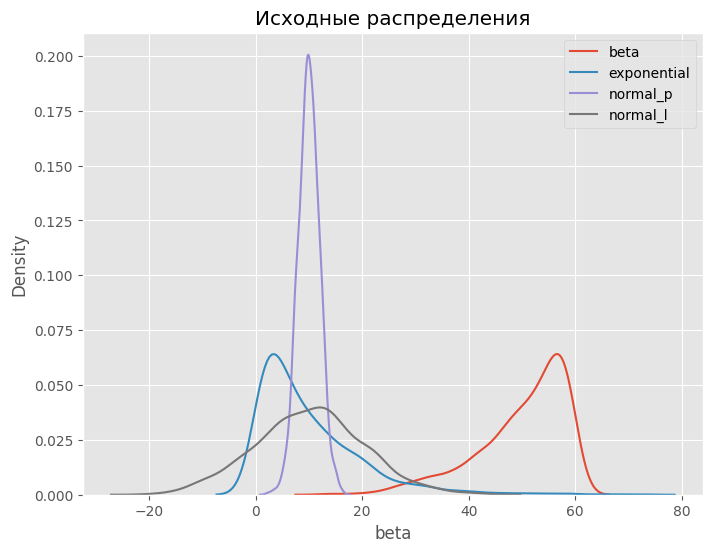

In [374]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [375]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

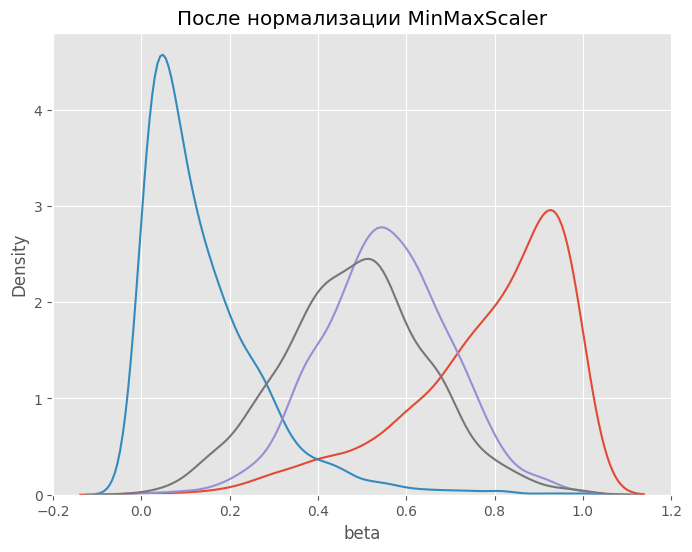

In [376]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

#### RobustScaler

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

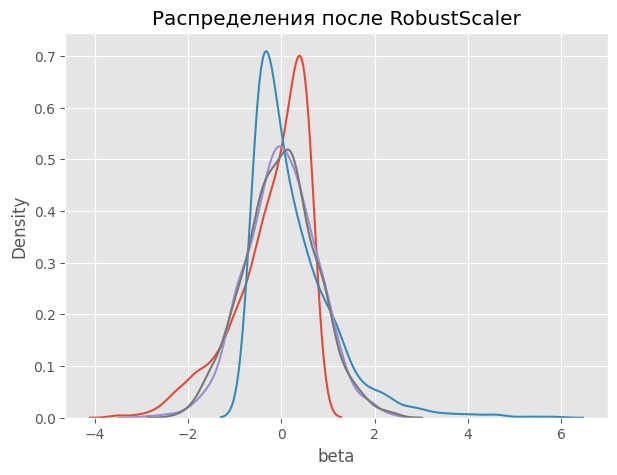

In [377]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 5))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

Поскольку MinMaxScaler использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

RobustScaler в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор RobustScaler.

## Стандартизация 

Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

### StandardScaler
Для стандартизации используем класс StandardScaler.

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

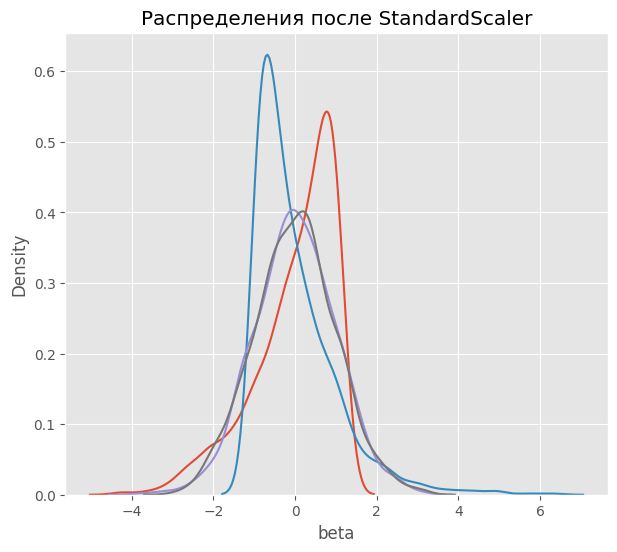

In [378]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 6))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)


In [379]:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


Задание 6.4  
Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.

В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого

In [380]:
#data = pd.read_csv('..\EDA-2. Математическая статистика в контексте EDA\data\wine_cleared.csv')


<Axes: title={'center': 'Распределения до RobustScaler'}, xlabel='price', ylabel='Density'>

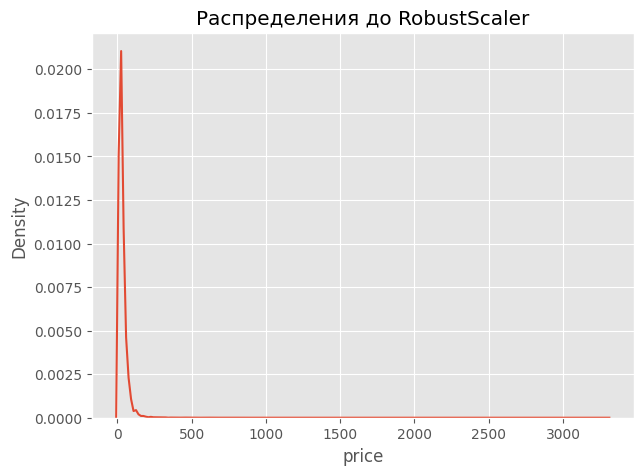

In [381]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 5))
ax1.set_title('Распределения до RobustScaler')
sns.kdeplot(data['price'], ax=ax1)

43433

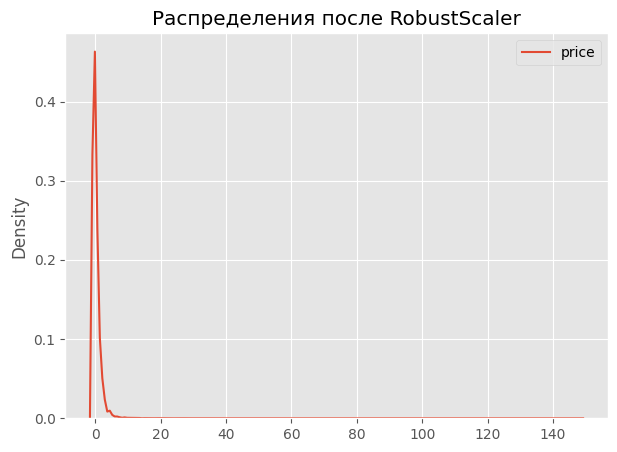

In [382]:

r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
data_norm = r_scaler.fit_transform(data[['price']])
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
data_norm = pd.DataFrame(data_norm, columns=['price'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 5))
ax1.set_title('Распределения после RobustScaler')
sns.kdeplot(data_norm, ax=ax1, label = 'After')
round(data_norm['price'].sum())

# Либо так
# data['price'] = preprocessing.RobustScaler().fit_transform(np.array(data['price']).reshape(-1,1))
# Тут применяется метод reshape(-1,1)), чтобы строку чисел преобразовать в столбец.


Задание 6.5
  
Стандартизируйте исходный признак price.

В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

In [383]:
#data['price'][129968]

In [384]:
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(data[['price']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=['price'])
#display(round(df_s.iloc[129968],2))

## Отбор признаков.Мультиколлинеарность

Отбор признаков — процесс выбора важных признаков, наиболее влияющих на предсказание.  
Мультиколлинеарность — сильная корреляционная связь между признаками, отбираемыми для обучения. 

In [385]:
import pandas as pd
df_iris = pd.read_csv('data\iris.csv')
df_iris

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Lario\AppData\Local\Temp\ipykernel_11896\1436836292.py:2: SyntaxWarning: invalid escape sequence '\i'
  df_iris = pd.read_csv('data\iris.csv')


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<Axes: >

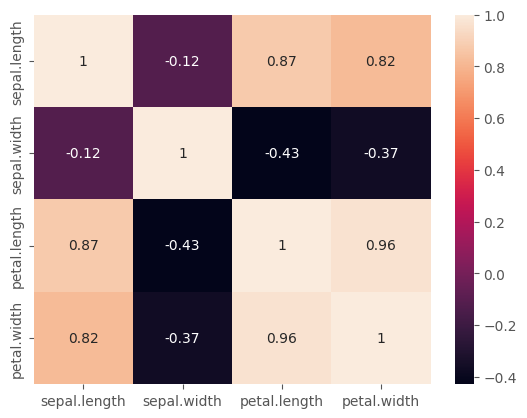

In [386]:
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(df_iris.corr(numeric_only=True), annot=True)

In [387]:
display(data.head(1))

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,taster_name_16,taster_name_17,taster_name_18,taster_name_19,taster_name_20,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,0,0,0,0,0,0,0,0,0,1


In [388]:
display(data.columns)


Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery', 'price_round', 'year', 'is_usa', 'is_france', 'is_italy',
       'year2', 'old_wine', 'locality', 'population', 'area', 'years_diff',
       'year', 'taster_name_1', 'taster_name_2', 'taster_name_3',
       'taster_name_4', 'taster_name_5', 'taster_name_6', 'taster_name_7',
       'taster_name_8', 'taster_name_9', 'taster_name_10', 'taster_name_11',
       'taster_name_12', 'taster_name_13', 'taster_name_14', 'taster_name_15',
       'taster_name_16', 'taster_name_17', 'taster_name_18', 'taster_name_19',
       'taster_name_20', 'taster_twitter_handle_0', 'taster_twitter_handle_1',
       'taster_twitter_handle_2', 'taster_twitter_handle_3',
       'taster_twitter_handle_4'],
      dtype='object')

Задание 7.4 (Самопроверка)

Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.

❗️ Удалять признак рейтинг — points нельзя!

❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.

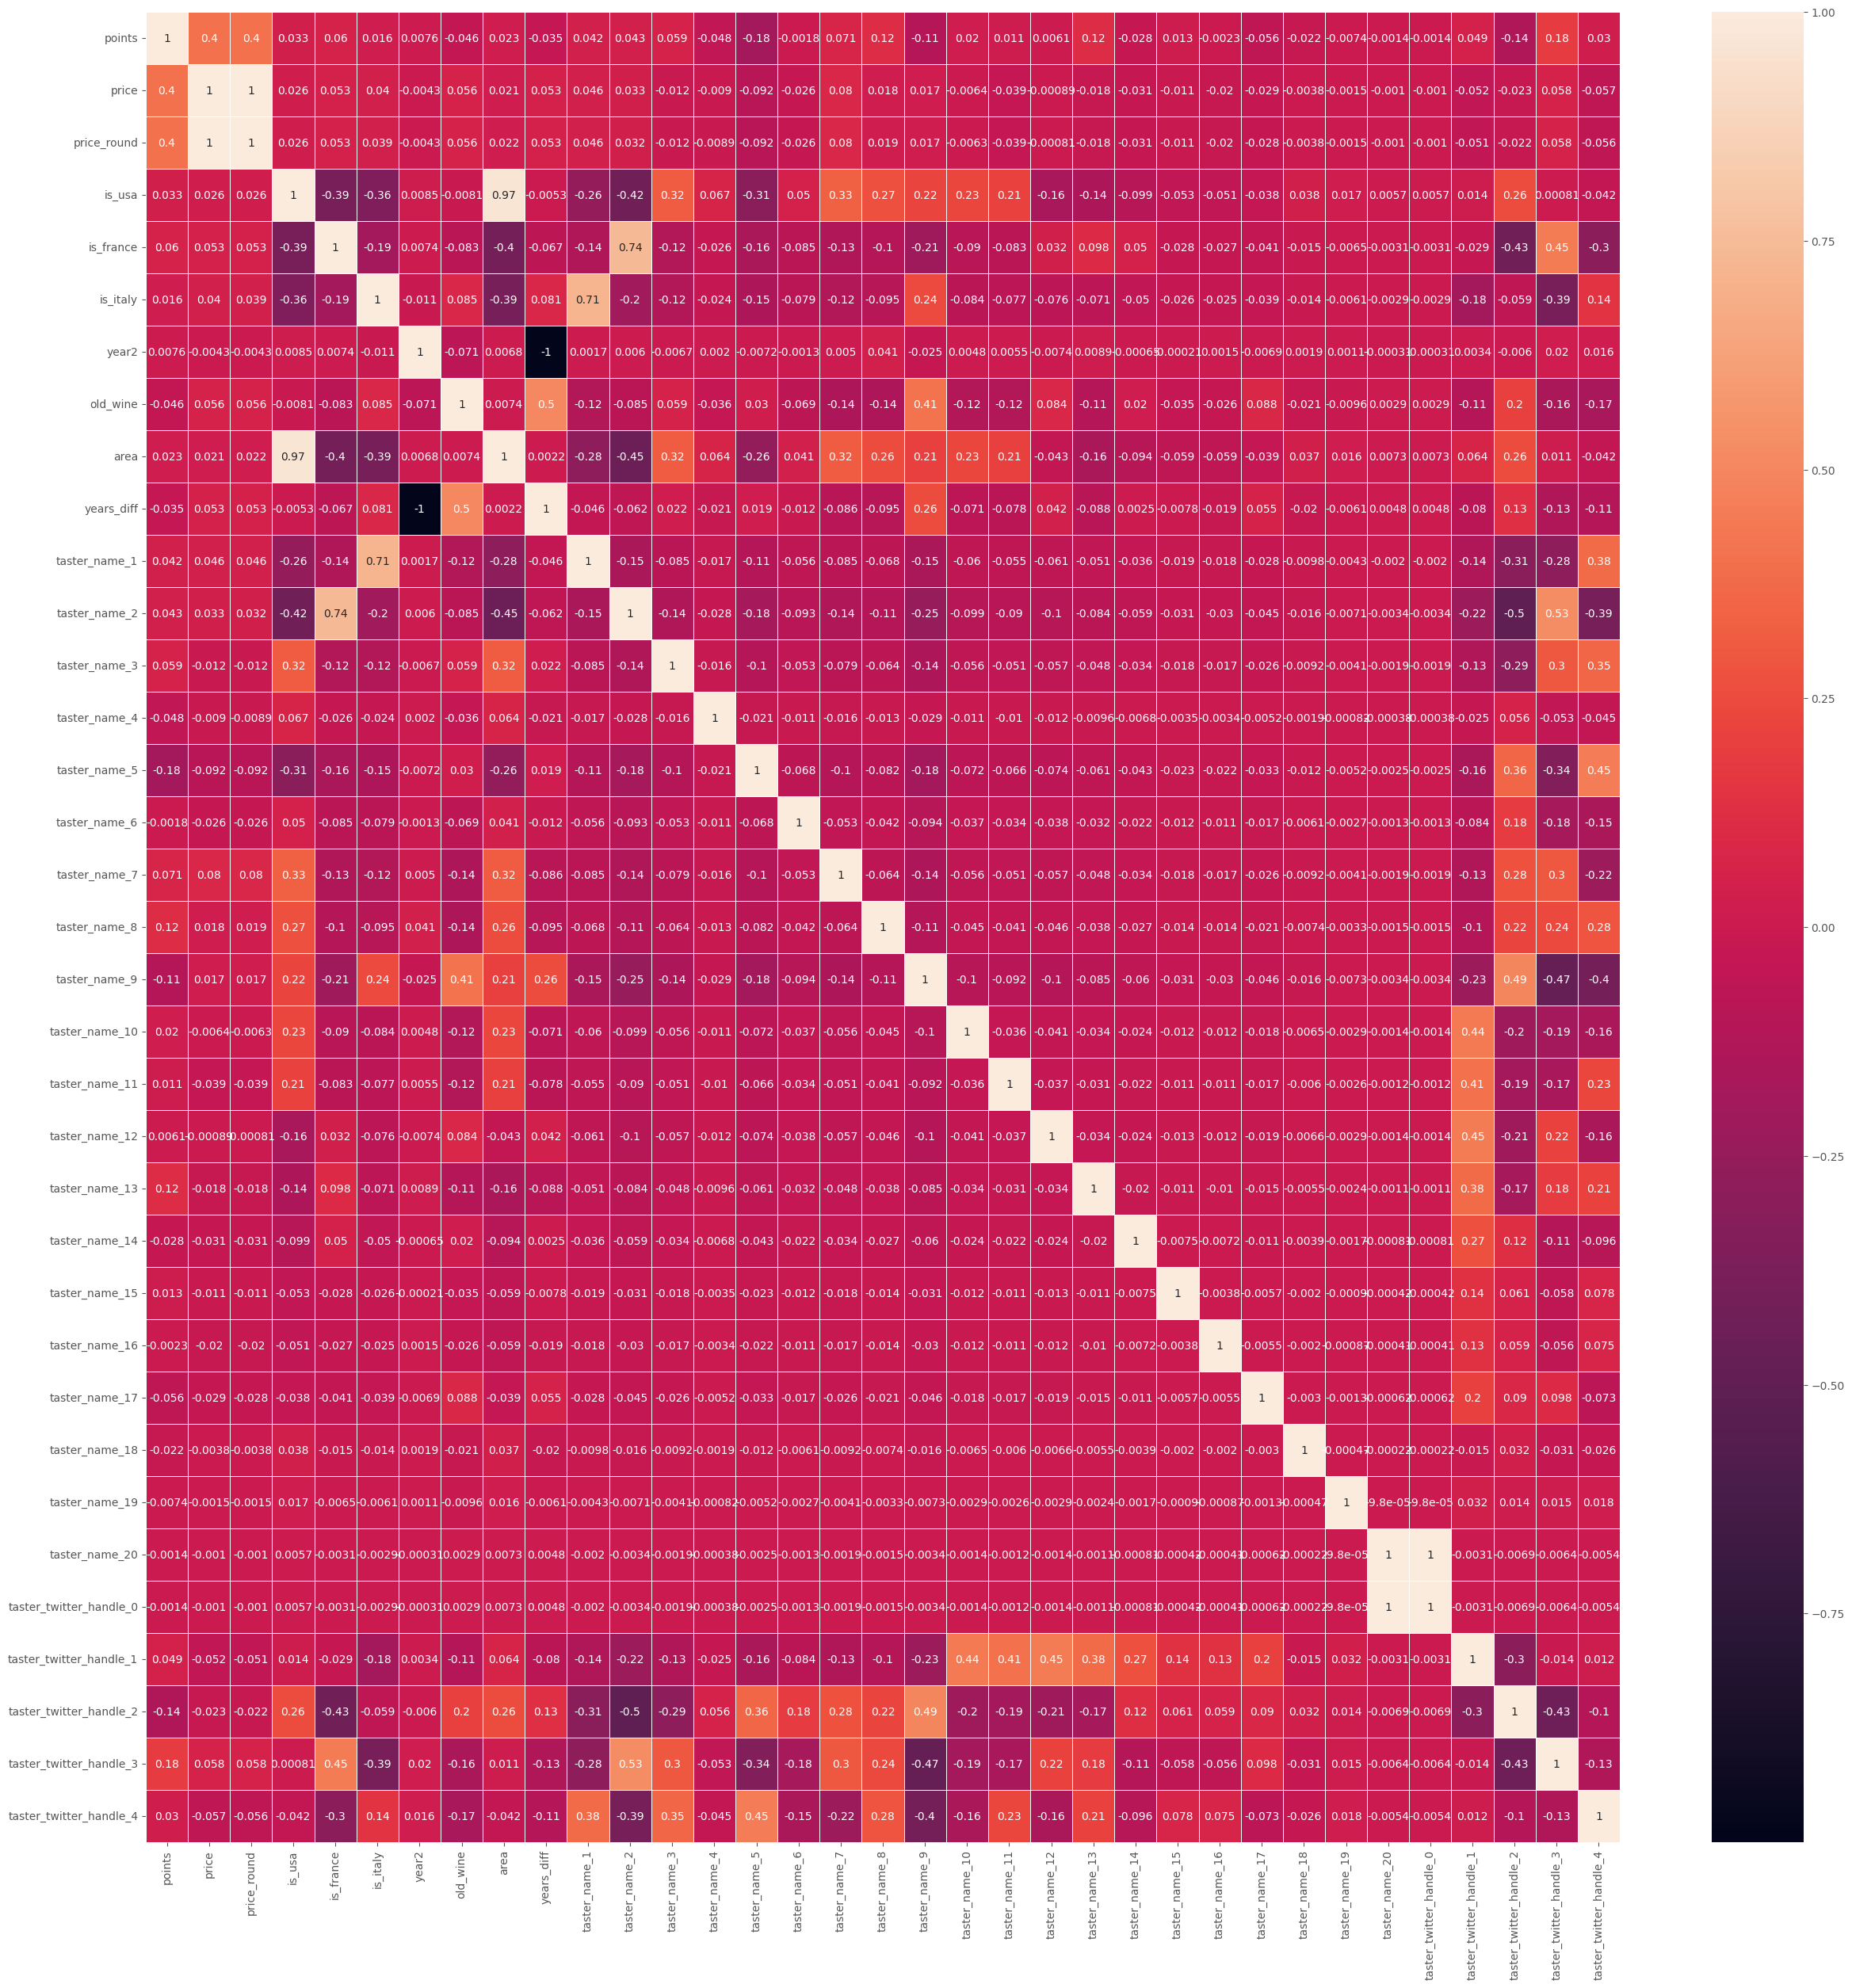

In [389]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'year2'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
#sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

<Axes: >

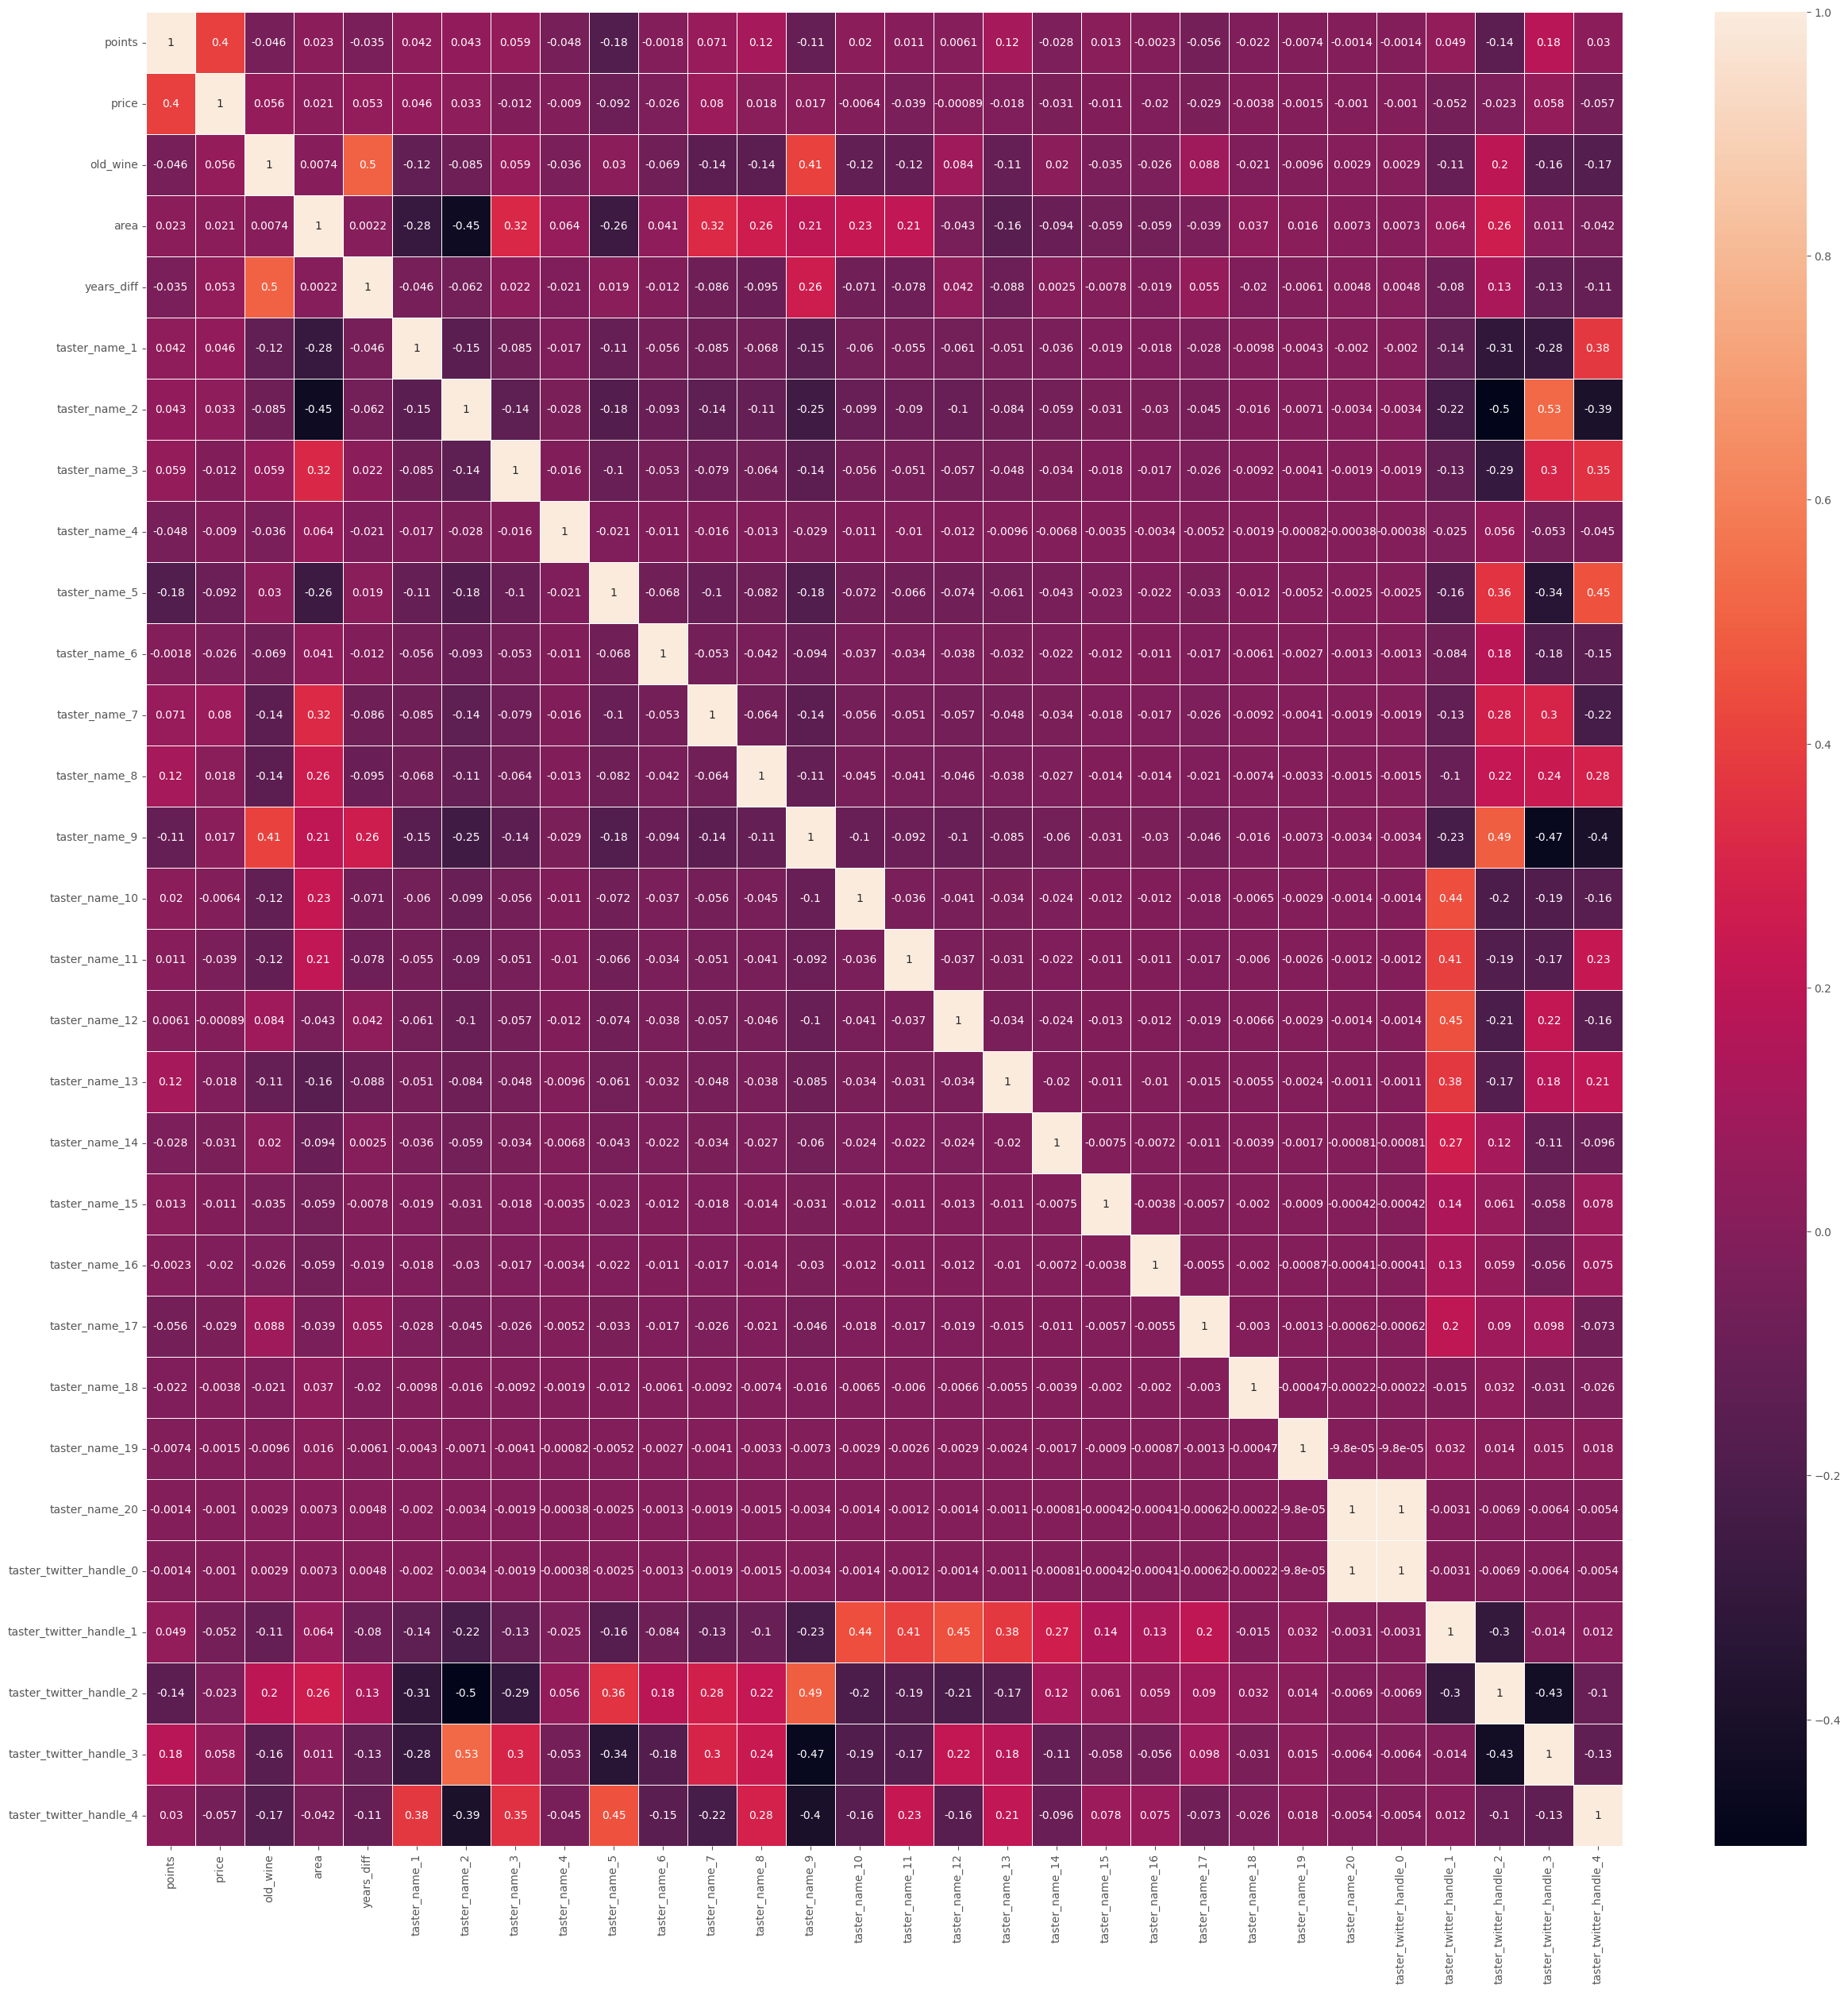

In [393]:
# Проверяем, что сильно скоррелированных признаков не осталось
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5)